Aminah Nurrahmawati
20220021

In [ ]:
# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("credit_card.csv")
print("Rows :", data.shape[0])
print("Columns :", data.shape[1])
data.head()

Rows : 8950
Columns : 18


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [28]:
data = data.drop("CUST_ID", axis=1)

In [29]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
data = data.fillna(0)

In [86]:
X=data.iloc[:,0:3].values
y=data.iloc[:, 4].values
display(X)
display(y)

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03]])

array([ 95.4,   0. ,   0. , ..., 144.4,   0. ,   0. ])

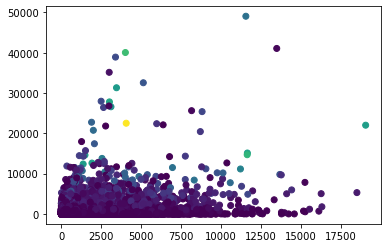

In [90]:
# Plot the data distribution (ground truth) using matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,2], c=y)

In [91]:
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
norm_ccData = normalize(scaled_data)

In [94]:
sse = {}
n_clust = np.arange(2,11)

for i in n_clust:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    sse[i] = kmeans.inertia_

In [95]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=0)

In [96]:
# Retrieve predictions and cluster centers (centroids).
display(kmeans.labels_)
display(kmeans.cluster_centers_)

array([1, 2, 1, ..., 1, 1, 1])

array([[ 0.3038162 ,  0.4399774 ,  1.50841129,  1.26595341,  1.24042189,
        -0.2501274 ,  1.1406149 ,  1.56273959,  0.94189309, -0.36170988,
        -0.25334922,  1.66314361,  0.87677229,  0.82022111,  0.15934702,
         0.50055629,  0.29880607],
       [-0.36791394, -0.18092508, -0.23497351, -0.206608  , -0.17591288,
        -0.30879825, -0.06729348, -0.24195344, -0.04940378, -0.33386802,
        -0.2984629 , -0.2472567 , -0.33749819, -0.28545894, -0.13929288,
         0.00418134, -0.02911616],
       [ 1.16663285,  0.34503103, -0.28928328, -0.20685582, -0.30404331,
         1.37669909, -0.6405117 , -0.30536897, -0.55247711,  1.56029747,
         1.33974524, -0.36412093,  0.59952253,  0.44519479,  0.40680961,
        -0.40989758, -0.12390356]])

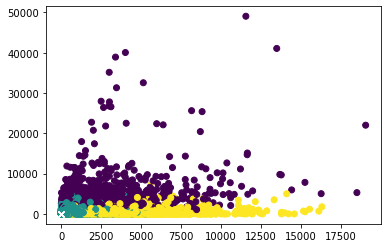

In [102]:
plt.scatter(X[:,0], X[:,2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

In [103]:
# We can make new predictions without re-run kmeans (simpily find nearest centroids).
X_new = data.iloc[:, 0:24].values
y_pred = kmeans.predict(X_new)

""" The below code is equivalent to:
y_pred = KMeans(...).fit_predict(X), but this needs to fit kmeans again.
"""

display(y_pred)

array([0, 2, 0, ..., 0, 0, 0])

In [104]:
kmeans.transform(X_new)

array([[ 1038.04270582,  1039.78434021,  1038.62906705],
       [10896.52394293, 10897.98152631, 10895.60298605],
       [ 8026.94707603,  8028.71194744,  8027.26644796],
       ...,
       [ 1026.14834897,  1027.9082216 ,  1026.89111707],
       [  506.4283919 ,   507.78639803,   506.56667398],
       [ 1997.31417438,  2000.00011475,  1999.02916941]])

In [105]:
kmeans_plus_plus = KMeans(n_clusters=3,
                n_init=3,
                init='k-means++',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit([k,j,k])

Initialization complete
Iteration 0, inertia 0.0
Converged at iteration 0: center shift 0.0 within tolerance 123.76052000922941
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 0.0
Converged at iteration 1: center shift 0.0 within tolerance 123.76052000922941
Initialization complete
Iteration 0, inertia 0.0
Converged at iteration 0: center shift 0.0 within tolerance 123.76052000922941


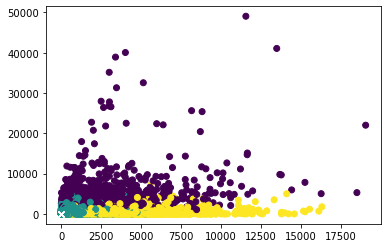

In [108]:
# Plot the predictions.
plt.scatter(X[:,0], X[:,2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

In [115]:
X_new = data.iloc[:,0:24]
y_pred = kmeans.predict(X_new)

""" The below code is equivalent to:
y_pred = KMeans(...).fit_predict(X), but this needs to fit kmeans again.
"""

display(y_pred)

array([0, 2, 0, ..., 0, 0, 0])

In [116]:
kmeans.transform(X_new)

array([[ 1038.04270582,  1039.78434021,  1038.62906705],
       [10896.52394293, 10897.98152631, 10895.60298605],
       [ 8026.94707603,  8028.71194744,  8027.26644796],
       ...,
       [ 1026.14834897,  1027.9082216 ,  1026.89111707],
       [  506.4283919 ,   507.78639803,   506.56667398],
       [ 1997.31417438,  2000.00011475,  1999.02916941]])

Drawback K-means

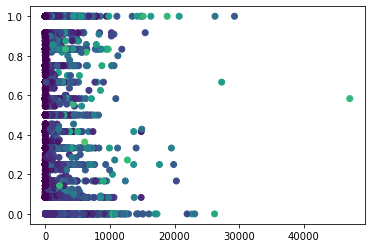

In [118]:
X=data.iloc[:,5:8].values
y=data.iloc[:, 9].values

# Plot the data distribution.
plt.scatter(X[:,0], X[:,1], c=y)

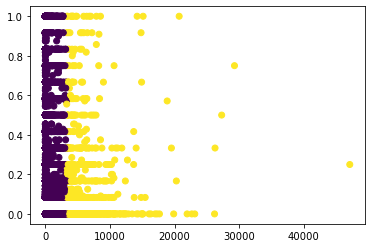

In [121]:
# Run k-means on non-spherical data.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.scatter(X[:,0], X[:,2], c=y_pred)

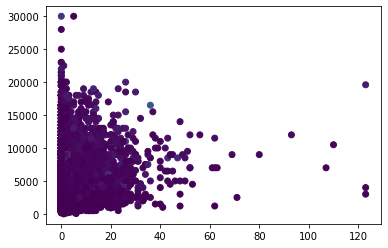

In [128]:
X=data.iloc[:,10:13].values
y=data.iloc[:, 14].values

# Plot the data distribution.
plt.scatter(X[:,0], X[:,2], c=y)

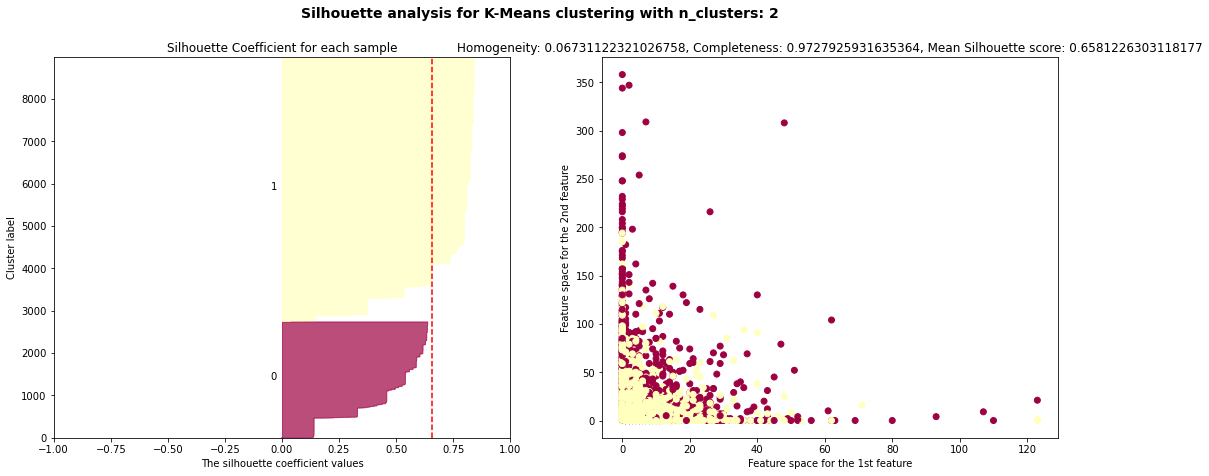

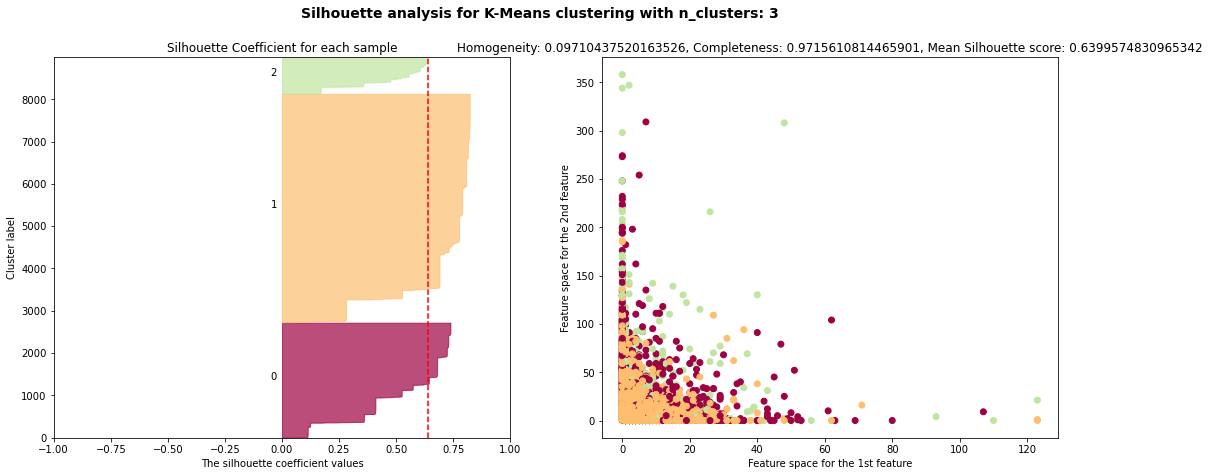

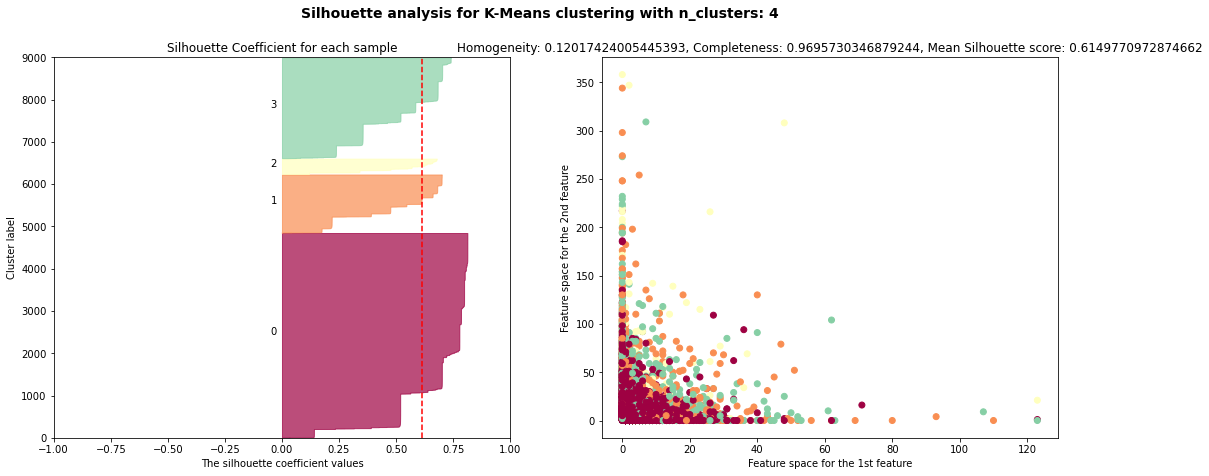

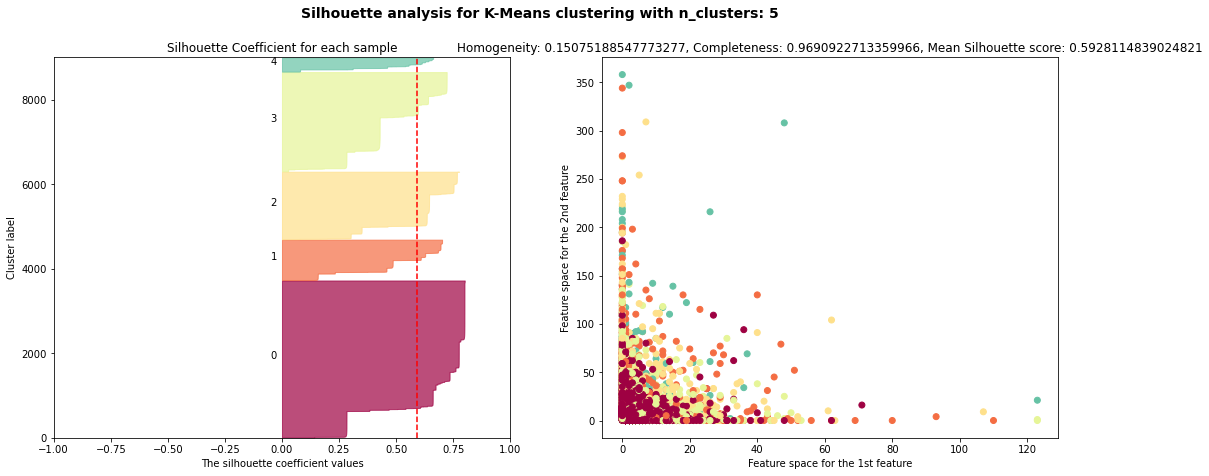

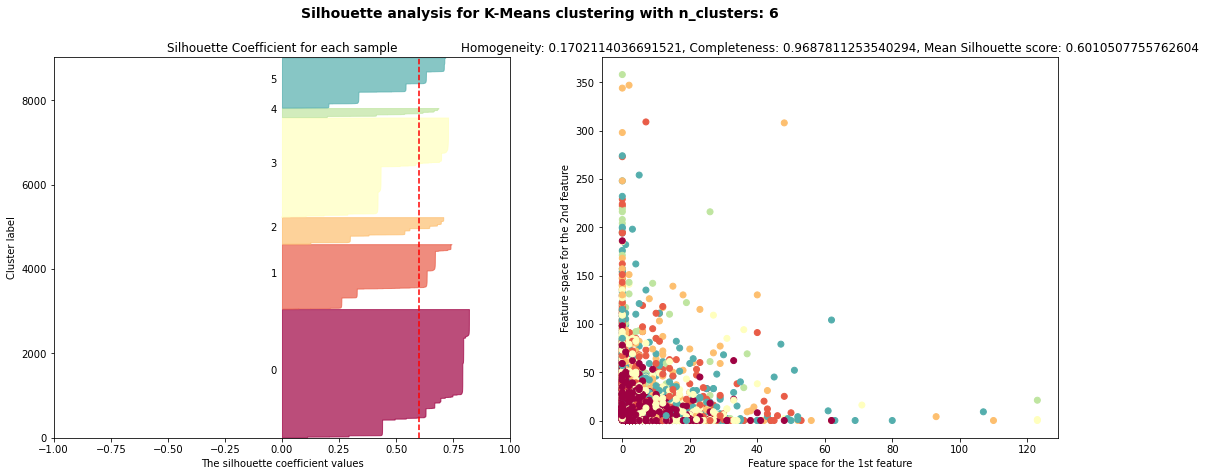

In [132]:
range_n_clusters = [2, 3, 4, 5, 6]

# For each number of clusters, perform Silhouette analysis and visualize the results.
for n_clusters in range_n_clusters:
    
    # Perform k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)
    
    # Compute the cluster homogeneity and completeness.
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(X, y_pred)
    
    # For plot configuration -----------------------------------------------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Configure plot.
    plt.suptitle('Silhouette analysis for K-Means clustering with n_clusters: {}'.format(n_clusters),
                 fontsize=14, fontweight='bold')
    
    # Configure 1st subplot.
    ax1.set_title('Silhouette Coefficient for each sample')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Configure 2st subplot.
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # For 1st subplot ------------------------------------------------------------------------------------------
    
    # Plot Silhouette Coefficient for each sample
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color="red", linestyle="--")
    
    # For 2st subplot -------------------------------------------------------------------------------------------
    
    # Plot the predictions
    colors = cmap(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors)

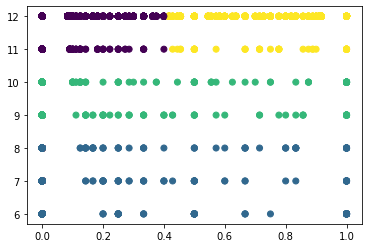

In [137]:
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Plot the prediction
plt.scatter(X[:,0], X[:,1], c=y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.03853431 11.95220425].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

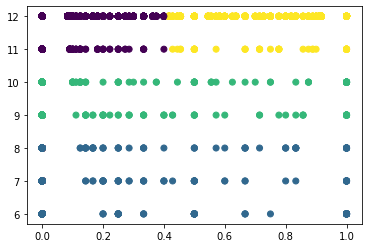

In [141]:
# Ratio for our distance threshold, controlling how many outliers we want to detect.
distance_threshold_ratio = 2.0

# Plot the prediction same as the above.
plt.scatter(X[:,0], X[:,1], c=y_pred)

# For each ith cluster, i=0~3 (we have 4 clusters in this example).
for i in [0, 1, 2, 3, 4, 5]:
    
    # Retrieve the indexs of data points belong to the ith cluster.
    # Note: `np.where()` wraps indexs in a tuple, thus we retrieve indexs using `tuple[0]`
    indexs_of_X_in_ith_cluster = np.where(y_pred == i)[0]

    # Retrieve the data points by the indexs
    X_in_ith_cluster = X[indexs_of_X_in_ith_cluster]
    
    # Retrieve the centroid.
    centroid = kmeans.cluster_centers_[i]
    
    # Compute distances between data points and the centroid.
    # Same as: np.sqrt(np.sum(np.square(X_in_ith_cluster - centroid), axis=1))
    # Note: distances.shape = (X_in_ith_cluster.shape[0], 1). A 2-D matrix.
    distances = metrics.pairwise.euclidean_distances(X_in_ith_cluster, centroid)
    
    # Compute the mean distance for ith cluster as our distance threshold.
    distance_threshold = np.mean(distances)
    
    # Retrieve the indexs of outliers in ith cluster
    # Note: distances.flatten() flattens 2-D matrix to vector, in order to compare with scalar `distance_threshold`.
    indexs_of_outlier = np.where(distances.flatten() > distance_threshold * distance_threshold_ratio)[0]
    
    # Retrieve outliers in ith cluster by the indexs
    outliers = X_in_ith_cluster[indexs_of_outlier]
    
    # Plot the outliers in ith cluster.
    plt.scatter(outliers[:,0], outliers[:,2], c='r')

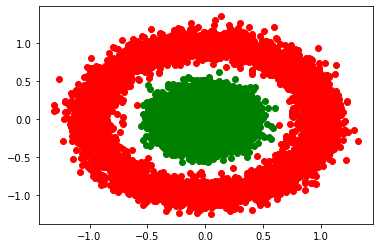

In [148]:
# Generate non-spherical data.
# Generate non-spherical data.
X, y = make_circles(n_samples=8950, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

Homogeneity: 0.00010898525570767414
Completeness: 0.00010899846400963217
Mean Silhouette score: 0.2925775840957163


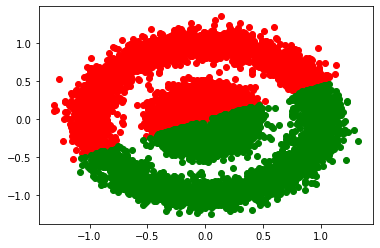

In [149]:
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Print the evaluations
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

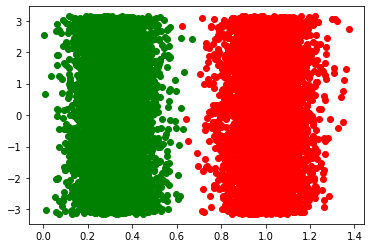

In [150]:
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

X_transformed = np.zeros_like(X)
X_transformed[:,0], X_transformed[:,1] = cart2pol(X[:,0], X[:,1])

plt.plot(X_transformed[y == 0, 0], X_transformed[y == 0, 1], 'ro')
plt.plot(X_transformed[y == 1, 0], X_transformed[y == 1, 1], 'go')

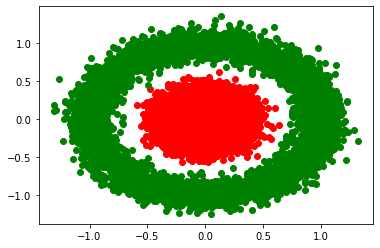

In [151]:
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

X_transformed = np.zeros_like(X)
# Convert cartesian (x-y) to polar coordinates.
X_transformed[:,0], _ = cart2pol(X[:,0], X[:,1])

# Only use `radius` feature to cluster.
y_pred = KMeans(n_clusters=2).fit_predict(X_transformed)

plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

DBSCAN

Number of clusters: 3
Homogeneity: 0.08758867141642644
Completeness: 0.5433608823398317
Mean Silhouette score: 0.3092674163733862


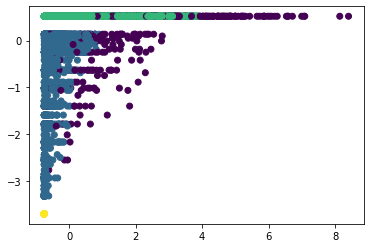

In [152]:
# Generate data with 3 centers.
X=data.iloc[:,0:3].values
y=data.iloc[:, 4].values

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

# Plot the predictions
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Print the evaluations
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

Number of clusters: 4
Homogeneity: 0.07943770389009178
Completeness: 0.528754149511773
Mean Silhouette score: 0.15197801547821113


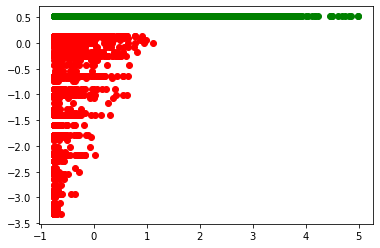

In [154]:
X=data.iloc[:,0:3].values
y=data.iloc[:, 4].values

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Print the evaluations
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))